In [2]:
from fastai.vision import *
import json
import pandas as pd
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
import coco_text
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
#path_coco = Path('/home/paperspace/data/coco')
path_coco = Path('/home/fredrikmathisen/Documents/data/coco')
#path_coco = Path('/home/jupyter/data/coco/')

In [4]:
#Paperspace path
#img_dir = Path('/home/paperspace/data/coco/images/train2014/')
#annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

#Local path mmiv
img_dir = path_coco/'images/train2014/'
annotations = path_coco/'annotations/COCO_Text.json'

#GCloud path
# img_dir = path_coco/'images/train2014/'
# annotations = path_coco/'annotations/COCO_Text.json'


In [5]:
ct = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:01.588784
creating index...
index created!


In [6]:
imgIds = ct.getImgIds(imgIds=ct.train, catIds=[('legibility','legible')])#,('class','machine printed')])

In [7]:
annots = ct.getAnnIds(imgIds=ct.val,
 catIds=[('legibility','legible')],#('class','machine printed')],
 areaRng=[0, 6000])

In [8]:
classes = {}
annotations = []
images = []
imgMetas = ct.loadImgs(ids=imgIds)
annotIds = ct.getAnnIds(imgIds=imgIds)
annotMetas = ct.loadAnns(annotIds)
for imgMeta in imgMetas:
    images.append( {'id': imgMeta['id'], 'file_name': imgMeta['file_name']} )

for annotMeta in annotMetas:
    bbox = annotMeta['bbox']
    image_id = annotMeta['image_id']
    category_id = annotMeta['class']
    classes[annotMeta['class']] = annotMeta['class']
    annotations.append({'bbox': bbox, 'image_id': image_id, 'category': category_id})

annot_dict = {'annotations': annotations, 'images': images, 'classes': classes}

In [9]:
def get_annotations(annot_dict, prefix=None):
    id2images, id2bboxes, id2cats = {}, collections.defaultdict(list), collections.defaultdict(list)

    classes = annot_dict['classes']
    for o in annot_dict['annotations']:
        bb = o['bbox']
        id2bboxes[o['image_id']].append([bb[1],bb[0], bb[3]+bb[1], bb[2]+bb[0]])
        id2cats[o['image_id']].append(classes[o['category']])
    for o in annot_dict['images']:
        if o['id'] in id2bboxes:
            id2images[o['id']] = ifnone(prefix, '') + o['file_name']
            ids = list(id2images.keys())
    return [id2images[k] for k in ids], [[id2bboxes[k], id2cats[k]] for k in ids]


In [9]:
annot_dict['annotations']

[{'bbox': [342.5074517548974,
   315.4072997275363,
   29.85074626865668,
   11.938202247190993],
  'image_id': 294914,
  'category': 'machine printed'},
 {'bbox': [273.23215838427484,
   153.17258883248735,
   12.951096121416548,
   29.124365482233472],
  'image_id': 294914,
  'category': 'machine printed'},
 {'bbox': [266.0895413071362,
   150.66010871630033,
   15.522388059701484,
   33.42696629213482],
  'image_id': 294914,
  'category': 'machine printed'},
 {'bbox': [393.85073533698693,
   255.71628849158128,
   7.164179104477597,
   31.03932584269661],
  'image_id': 294914,
  'category': 'machine printed'},
 {'bbox': [302.89284340853305,
   260.988206377662,
   22.224933300121393,
   36.21944906108229],
  'image_id': 294914,
  'category': 'machine printed'},
 {'bbox': [348.54771784232366,
   334.95858707783384,
   63.73443983402488,
   99.37888198757769],
  'image_id': 196610,
  'category': 'machine printed'},
 {'bbox': [304.73029045643153,
   438.3126243449146,
   15.93360995850

In [20]:
images, lbl_bbox = get_annotations(annot_dict)
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[o.split('/')[-1]]

In [11]:
lbl_bbox

[[[[315.4072997275363,
    342.5074517548974,
    327.3455019747273,
    372.35819802355405],
   [153.17258883248735,
    273.23215838427484,
    182.29695431472084,
    286.18325450569137],
   [150.66010871630033,
    266.0895413071362,
    184.08707500843514,
    281.61192936683767],
   [255.71628849158128,
    393.85073533698693,
    286.7556143342779,
    401.0149144414645],
   [260.988206377662,
    302.89284340853305,
    297.20765543874427,
    325.11777670865445]],
  ['machine printed',
   'machine printed',
   'machine printed',
   'machine printed',
   'machine printed']],
 [[[334.95858707783384,
    348.54771784232366,
    434.33746906541154,
    412.28215767634856],
   [438.3126243449146,
    304.73029045643153,
    454.21324546292703,
    320.66390041493776],
   [187.87784173621895,
    410.29045643153523,
    209.74119577348603,
    432.1991701244813],
   [277.31883552503876,
    242.9875518672199,
    305.14492248156057,
    264.896265560166],
   [183.90268645671583,
   

In [12]:
img2bbox['COCO_train2014_000000294914.jpg']

[[[315.4072997275363,
   342.5074517548974,
   327.3455019747273,
   372.35819802355405],
  [153.17258883248735,
   273.23215838427484,
   182.29695431472084,
   286.18325450569137],
  [150.66010871630033,
   266.0895413071362,
   184.08707500843514,
   281.61192936683767],
  [255.71628849158128,
   393.85073533698693,
   286.7556143342779,
   401.0149144414645],
  [260.988206377662,
   302.89284340853305,
   297.20765543874427,
   325.11777670865445]],
 ['machine printed',
  'machine printed',
  'machine printed',
  'machine printed',
  'machine printed']]

In [13]:
type(images)

list

In [11]:
img_df = pd.DataFrame(images, columns=['file_name'])
img_df.head()

,file_name
0,COCO_train2014_000000294914.jpg
1,COCO_train2014_000000196610.jpg
2,COCO_train2014_000000458756.jpg
3,COCO_train2014_000000491526.jpg
4,COCO_train2014_000000032778.jpg


In [12]:
annot_df = pd.DataFrame(lbl_bbox, columns=['bbox', 'classes'])
annot_df.head()

,bbox,classes
0,"[[315.4072997275363, 342.5074517548974, 327.34...","[machine printed, machine printed, machine pri..."
1,"[[334.95858707783384, 348.54771784232366, 434....","[machine printed, machine printed, machine pri..."
2,"[[256, 266, 287, 309], [93.56962025316459, 324...","[machine printed, machine printed, machine pri..."
3,"[[198.76056338028167, 225.51095071353063, 232....","[machine printed, machine printed, machine pri..."
4,"[[478, 164, 491, 220], [478, 226, 492, 323]]","[machine printed, machine printed]"


In [13]:
annot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15124 entries, 0 to 15123
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox     15124 non-null  object
 1   classes  15124 non-null  object
dtypes: object(2)
memory usage: 236.4+ KB


In [14]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15124 entries, 0 to 15123
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  15124 non-null  object
dtypes: object(1)
memory usage: 118.3+ KB


In [18]:
def get_data(bs, size):
    src = ObjectItemList.from_df(img_df, img_dir)
    src = src.split_by_rand_pct()
    src = src.label_from_func(get_y_func)
    src = src.transform(get_transforms(), size=size, tfm_y=True, padding_mode='zeros')
    return src.databunch(path=path_coco, bs=bs, collate_fn=bb_pad_collate)

In [21]:
data = get_data(16, 256)

/home/fredrikmathisen/anaconda3/envs/fastai-old/lib/python3.6/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


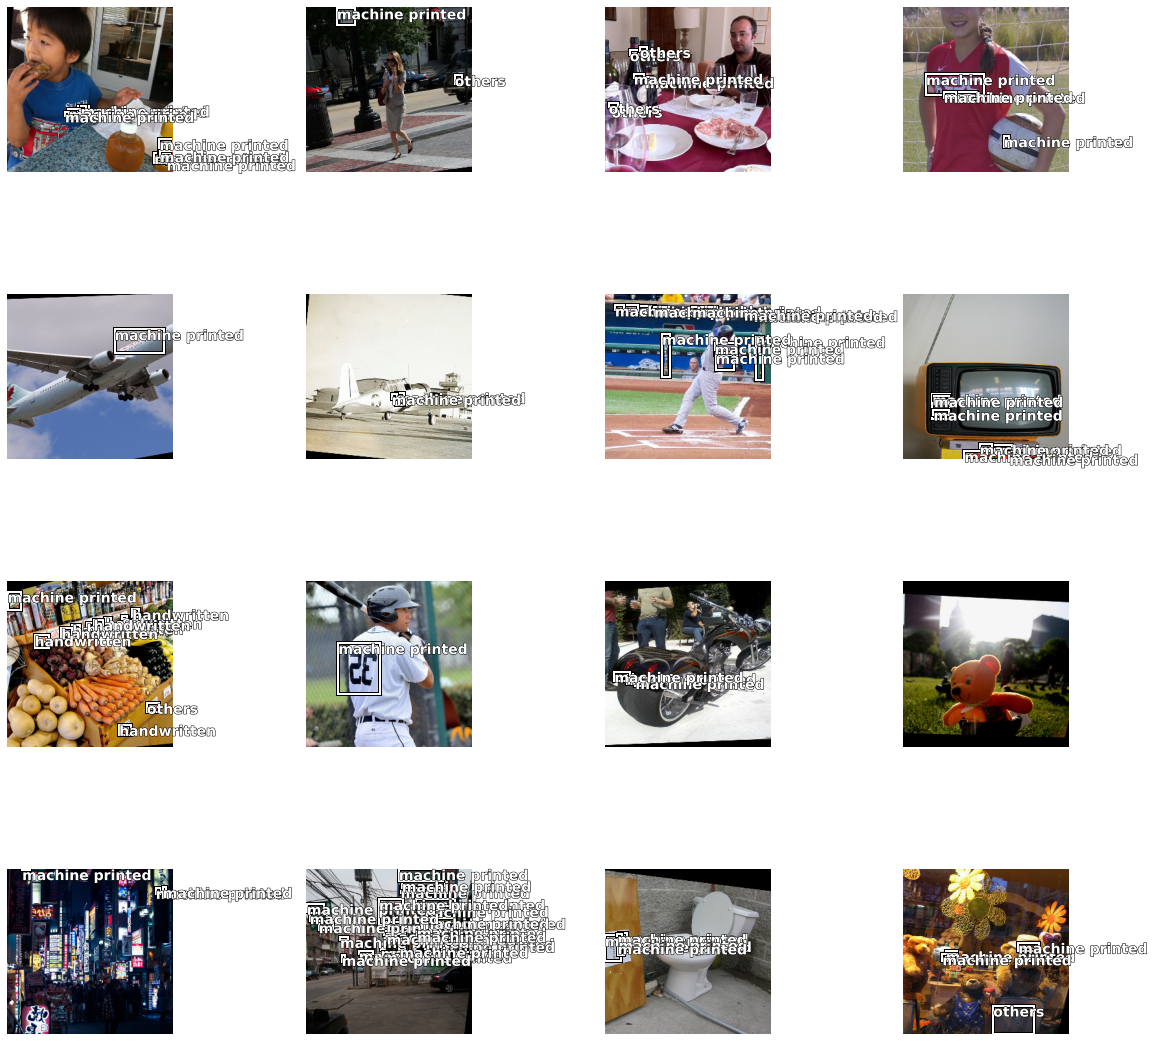

In [22]:
data.show_batch()

## Data

We are going to use the [Pascal dataset](http://host.robots.ox.ac.uk/pascal/VOC/) for object detection. There is a version from 2007 and a bigger version from 2012. We'll use the 2007 version here. 

The annotations for the images are stored in json files that give the bounding boxes for each class.

## Model

The architecture we will use is a [RetinaNet](https://arxiv.org/abs/1708.02002), which is based on a [Feature Pyramid Network](https://arxiv.org/abs/1612.03144). 

![Retina net](images/retinanet.png)

This is a bit like a Unet in the sense we have a branch where the image is progressively reduced then another one where we upsample it again, and there are lateral connections, but we will use the feature maps produced at each level for our final predictions. Specifically, if we start with an image of size (256,256), the traditional resnet has intermediate features maps of sizes:
- C1 (128, 128)  
- C2 (64, 64)
- C3 (32, 32)
- C4 (16, 16)
- C5 (8, 8)
To which the authors add two other features maps C6 and C7 of sizes (4,4) and (2,2) by using stride-2 convolutions. (Note that the model requires an image size of 128 at the minimum because of this.)

Then we have P7 = C7 and we go down from P7 to P2 by upsampling the result of the previous P-layer and adding a lateral connection. The idea is that the last feature map P7 will be responsible to detect big objects, while one like P3 will be responsible to detect smaller objects. 

Each P-something feature map then goes through two subnet of four convolutional layers (with the same weights for all the feature maps), one that will be responsible for finding the category of the object and the other for drawing the bounding box. Each location in the feature map is assigned a given number of anchors (see below) so the classifier ends up with `n_anchors * n_classes` channels and the bounding box regressor with `n_anchors * 4` channels.

In [20]:
#Grab the convenience functions that helps us buil the Unet
from fastai.vision.models.unet import _get_sfs_idxs, model_sizes, hook_outputs

In [21]:
class LateralUpsampleMerge(nn.Module):
    "Merge the features coming from the downsample path (in `hook`) with the upsample path."
    def __init__(self, ch, ch_lat, hook):
        super().__init__()
        self.hook = hook
        self.conv_lat = conv2d(ch_lat, ch, ks=1, bias=True)
    
    def forward(self, x):
        return self.conv_lat(self.hook.stored) + F.interpolate(x, self.hook.stored.shape[-2:], mode='nearest')

In [22]:
class RetinaNet(nn.Module):
    "Implements RetinaNet from https://arxiv.org/abs/1708.02002"
    def __init__(self, encoder:nn.Module, n_classes, final_bias=0., chs=256, n_anchors=9, flatten=True):
        super().__init__()
        self.n_classes,self.flatten = n_classes,flatten
        imsize = (256,256)
        sfs_szs = model_sizes(encoder, size=imsize)
        sfs_idxs = list(reversed(_get_sfs_idxs(sfs_szs)))
        self.sfs = hook_outputs([encoder[i] for i in sfs_idxs])
        self.encoder = encoder
        self.c5top5 = conv2d(sfs_szs[-1][1], chs, ks=1, bias=True)
        self.c5top6 = conv2d(sfs_szs[-1][1], chs, stride=2, bias=True)
        self.p6top7 = nn.Sequential(nn.ReLU(), conv2d(chs, chs, stride=2, bias=True))
        self.merges = nn.ModuleList([LateralUpsampleMerge(chs, sfs_szs[idx][1], hook) 
                                     for idx,hook in zip(sfs_idxs[-2:-4:-1], self.sfs[-2:-4:-1])])
        self.smoothers = nn.ModuleList([conv2d(chs, chs, 3, bias=True) for _ in range(3)])
        self.classifier = self._head_subnet(n_classes, n_anchors, final_bias, chs=chs)
        self.box_regressor = self._head_subnet(4, n_anchors, 0., chs=chs)
        
    def _head_subnet(self, n_classes, n_anchors, final_bias=0., n_conv=4, chs=256):
        "Helper function to create one of the subnet for regression/classification."
        layers = [conv_layer(chs, chs, bias=True, norm_type=None) for _ in range(n_conv)]
        layers += [conv2d(chs, n_classes * n_anchors, bias=True)]
        layers[-1].bias.data.zero_().add_(final_bias)
        layers[-1].weight.data.fill_(0)
        return nn.Sequential(*layers)
    
    def _apply_transpose(self, func, p_states, n_classes):
        #Final result of the classifier/regressor is bs * (k * n_anchors) * h * w
        #We make it bs * h * w * n_anchors * k then flatten in bs * -1 * k so we can contenate
        #all the results in bs * anchors * k (the non flatten version is there for debugging only)
        if not self.flatten: 
            sizes = [[p.size(0), p.size(2), p.size(3)] for p in p_states]
            return [func(p).permute(0,2,3,1).view(*sz,-1,n_classes) for p,sz in zip(p_states,sizes)]
        else:
            return torch.cat([func(p).permute(0,2,3,1).contiguous().view(p.size(0),-1,n_classes) for p in p_states],1)
    
    def forward(self, x):
        c5 = self.encoder(x)
        p_states = [self.c5top5(c5.clone()), self.c5top6(c5)]
        p_states.append(self.p6top7(p_states[-1]))
        for merge in self.merges: p_states = [merge(p_states[0])] + p_states
        for i, smooth in enumerate(self.smoothers[:3]):
            p_states[i] = smooth(p_states[i])
        return [self._apply_transpose(self.classifier, p_states, self.n_classes), 
                self._apply_transpose(self.box_regressor, p_states, 4),
                [[p.size(2), p.size(3)] for p in p_states]]
    
    def __del__(self):
        if hasattr(self, "sfs"): self.sfs.remove()

The model is a bit complex, but that's not the hardest part. It will spit out an absurdly high number of predictions: for the features P3 to P7 with an image size of 256, we have `32*32 + 16*16 + 8*8 + 4*4 +2*2` locations possible in one of the five feature maps, which gives 1,364 possible detections, multiplied by the number of anchors we choose to attribute to each location (9 below), which makes 12,276 possible hits.

A lot of those aren't going to correspond to any object in the picture, and we need to somehow match all those predictions to either nothing or a given bounding box in the picture.

## "Encore" boxes

If we look at the feature map of size `4*4`, we have 16 locations numbered like below: 

In [23]:
torch.arange(0,16).long().view(4,4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

The most basic way to map one of these features with an actual area inside the image is to create the regular 4 by 4 grid. Our convention is that `y` is first (like in numpy or PyTorch), and that all coordinates are scaled from -1 to 1 (-1 being top/right, 1 being bottom/left). 

In [24]:
def create_grid(size):
    "Create a grid of a given `size`."
    H, W = size if is_tuple(size) else (size,size)
    grid = FloatTensor(H, W, 2)
    linear_points = torch.linspace(-1+1/W, 1-1/W, W) if W > 1 else tensor([0.])
    grid[:, :, 1] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, 0])
    linear_points = torch.linspace(-1+1/H, 1-1/H, H) if H > 1 else tensor([0.])
    grid[:, :, 0] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, 1])
    return grid.view(-1,2)

Let's use a helper function to draw those anchors:

In [25]:
def show_anchors(ancs, size):
    _,ax = plt.subplots(1,1, figsize=(5,5))
    ax.set_xticks(np.linspace(-1,1, size[1]+1))
    ax.set_yticks(np.linspace(-1,1, size[0]+1))
    ax.grid()
    ax.scatter(ancs[:,1], ancs[:,0]) #y is first
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlim(-1,1)
    ax.set_ylim(1,-1) #-1 is top, 1 is bottom
    for i, (x, y) in enumerate(zip(ancs[:, 1], ancs[:, 0])): ax.annotate(i, xy = (x,y))

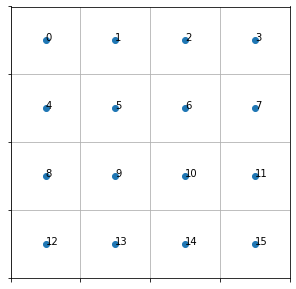

In [26]:
size = (4,4)
show_anchors(create_grid(size), size)

In practice, we use different ratios and scales of that basic grid to build our anchors, because bounding boxes aren't always a perfect square inside a grid. 

In [27]:
def create_anchors(sizes, ratios, scales, flatten=True):
    "Create anchor of `sizes`, `ratios` and `scales`."
    aspects = [[[s*math.sqrt(r), s*math.sqrt(1/r)] for s in scales] for r in ratios]
    aspects = torch.tensor(aspects).view(-1,2)
    anchors = []
    for h,w in sizes:
        #4 here to have the anchors overlap.
        sized_aspects = 4 * (aspects * torch.tensor([2/h,2/w])).unsqueeze(0)
        base_grid = create_grid((h,w)).unsqueeze(1)
        n,a = base_grid.size(0),aspects.size(0)
        ancs = torch.cat([base_grid.expand(n,a,2), sized_aspects.expand(n,a,2)], 2)
        anchors.append(ancs.view(h,w,a,4))
    return torch.cat([anc.view(-1,4) for anc in anchors],0) if flatten else anchors

In [28]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)] 
#Paper used [1,2**(1/3), 2**(2/3)] but a bigger size (600) too, so the largest feature map gave anchors that cover less of the image.
sizes = [(2**i,2**i) for i in range(5)]
sizes.reverse() #Predictions come in the order of the smallest feature map to the biggest
anchors = create_anchors(sizes, ratios, scales)

In [29]:
anchors.size()

torch.Size([3069, 4])

That's a bit less than in our computation earlier, but this is because it's for the case of (128,128) images (sizes go from (1,1) to (32,32) instead of (2,2) to (64,64)).

In [30]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

num_color = 12
cmap = get_cmap(num_color)
color_list = [cmap(float(x)) for x in range(num_color)]

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [31]:
def show_boxes(boxes):
    "Show the `boxes` (size by 4)"
    _, ax = plt.subplots(1,1, figsize=(5,5))
    ax.set_xlim(-1,1)
    ax.set_ylim(1,-1)
    for i, bbox in enumerate(boxes):
        bb = bbox.numpy()
        rect = [bb[1]-bb[3]/2, bb[0]-bb[2]/2, bb[3], bb[2]]
        draw_rect(ax, rect, color=color_list[i%num_color])
        draw_text(ax, [bb[1]-bb[3]/2,bb[0]-bb[2]/2], str(i), color=color_list[i%num_color])

Here is an example of the 9 anchor boxes with different scales/ratios on one region of the image. Now imagine we have this at every location of each of the feature maps.

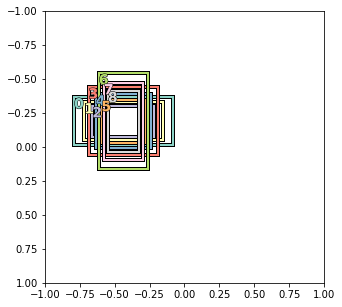

In [32]:
show_boxes(anchors[900:909])

For each anchor, we have one class predicted by the classifier and 4 floats `p_y,p_x,p_h,p_w` predicted by the regressor. If the corresponding anchor as a center in `anc_y`, `anc_x` with dimensions `anc_h`, `anc_w`, the predicted bounding box has those characteristics:
```
center = [p_y * anc_h + anc_y, p_x * anc_w + anc_x]
height = anc_h * exp(p_h)
width  = anc_w * exp(p_w)
```
The idea is that a prediction of `(0,0,0,0)` corresponds to the anchor itself.

The next function converts the activations of the model in bounding boxes.

In [33]:
def activ_to_bbox(acts, anchors, flatten=True):
    "Extrapolate bounding boxes on anchors from the model activations."
    if flatten:
        acts.mul_(acts.new_tensor([[0.1, 0.1, 0.2, 0.2]])) #Can't remember where those scales come from, but they help regularize
        centers = anchors[...,2:] * acts[...,:2] + anchors[...,:2]
        sizes = anchors[...,2:] * torch.exp(acts[...,:2])
        return torch.cat([centers, sizes], -1)
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

Here is an example with the 3 by 4 regular grid and random predictions.

In [34]:
size=(3,4)
anchors = create_grid(size)
anchors = torch.cat([anchors, torch.tensor([2/size[0],2/size[1]]).expand_as(anchors)], 1)
activations = torch.randn(size[0]*size[1], 4) * 0.1
bboxes = activ_to_bbox(activations, anchors)

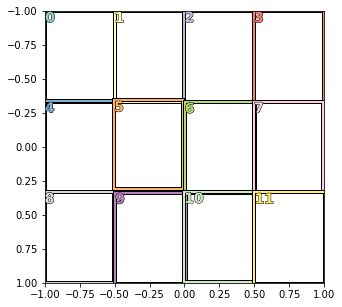

In [35]:
show_boxes(bboxes)

This helper function changes boxes in the format center/height/width to top/left/bottom/right.

In [36]:
def cthw2tlbr(boxes):
    "Convert center/size format `boxes` to top/left bottom/right corners."
    top_left = boxes[:,:2] - boxes[:,2:]/2
    bot_right = boxes[:,:2] + boxes[:,2:]/2
    return torch.cat([top_left, bot_right], 1)


Now to decide which predicted bounding box will match a given ground truth object, we will compute the intersection over unions ratios between all the anchors and all the targets, then we will keep the ones that have an overlap greater than a given threshold (0.5).

In [37]:
def intersection(anchors, targets):
    "Compute the sizes of the intersections of `anchors` by `targets`."
    ancs, tgts = cthw2tlbr(anchors), cthw2tlbr(targets)
    a, t = ancs.size(0), tgts.size(0)
    ancs, tgts = ancs.unsqueeze(1).expand(a,t,4), tgts.unsqueeze(0).expand(a,t,4)
    top_left_i = torch.max(ancs[...,:2], tgts[...,:2])
    bot_right_i = torch.min(ancs[...,2:], tgts[...,2:])
    sizes = torch.clamp(bot_right_i - top_left_i, min=0) 
    return sizes[...,0] * sizes[...,1]

Let's see some results, if we have our 12 anchors from before...

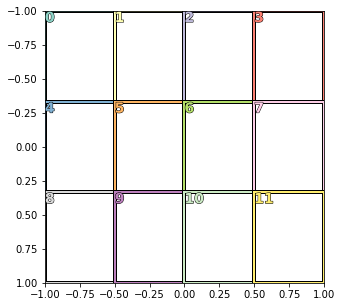

In [38]:
show_boxes(anchors)

... and those targets (0. is the whole image)

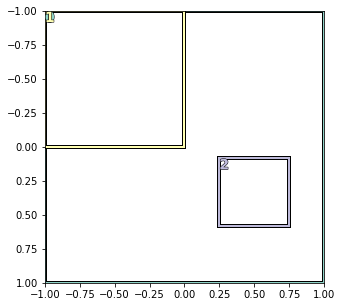

In [39]:
targets = torch.tensor([[0.,0.,2.,2.], [-0.5,-0.5,1.,1.], [1/3,0.5,0.5,0.5]])
show_boxes(targets)

Then the intersections of each bboxes by each targets are:

In [40]:
intersection(anchors, targets)

tensor([[0.3333, 0.3333, 0.0000],
        [0.3333, 0.3333, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.1667, 0.0000],
        [0.3333, 0.1667, 0.0000],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0625]])

In [41]:
def IoU_values(anchors, targets):
    "Compute the IoU values of `anchors` by `targets`."
    inter = intersection(anchors, targets)
    anc_sz, tgt_sz = anchors[:,2] * anchors[:,3], targets[:,2] * targets[:,3]
    union = anc_sz.unsqueeze(1) + tgt_sz.unsqueeze(0) - inter
    return inter/(union+1e-8)

And then the IoU values are.

In [42]:
IoU_values(anchors, targets)

tensor([[0.0833, 0.3333, 0.0000],
        [0.0833, 0.3333, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.1429, 0.0000],
        [0.0833, 0.1429, 0.0000],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.1200]])

Then we match a anchor to targets with the following rules:
- for each anchor we take the maximum overlap possible with any of the targets.
- if that maximum overlap is less than 0.4, we match the anchor box to background, the classifier's target will be that class
- if the maximum overlap is greater than 0.5, we match the anchor box to that ground truth object. The classifier's target will be the category of that target
- if the maximum overlap is between 0.4 and 0.5, we ignore that anchor in our loss computation
- optionally, we force-match for each ground truth object the anchor that has the maximum overlap with it (not sure it helps)

In [43]:
def match_anchors(anchors, targets, match_thr=0.5, bkg_thr=0.4):
    "Match `anchors` to targets. -1 is match to background, -2 is ignore."
    matches = anchors.new(anchors.size(0)).zero_().long() - 2
    if targets.numel() == 0: return matches
    ious = IoU_values(anchors, targets)
    vals,idxs = torch.max(ious,1)
    matches[vals < bkg_thr] = -1
    matches[vals > match_thr] = idxs[vals > match_thr]
    #Overwrite matches with each target getting the anchor that has the max IoU.
    #vals,idxs = torch.max(ious,0)
    #If idxs contains repetition, this doesn't bug and only the last is considered.
    #matches[idxs] = targets.new_tensor(list(range(targets.size(0)))).long()
    return matches

In our previous example, no one had an overlap > 0.5, so unless we use the special rule commented out, there are no matches.

In [44]:
match_anchors(anchors, targets)

tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

With anchors very close to the targets.

In [45]:
size=(3,4)
anchors = create_grid(size)
anchors = torch.cat([anchors, torch.tensor([2/size[0],2/size[1]]).expand_as(anchors)], 1)
activations = 0.1 * torch.randn(size[0]*size[1], 4)
bboxes = activ_to_bbox(activations, anchors)
match_anchors(anchors,bboxes)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

With anchors in the grey area.

In [46]:
anchors = create_grid((2,2))
anchors = torch.cat([anchors, torch.tensor([1.,1.]).expand_as(anchors)], 1)
targets = anchors.clone()
anchors = torch.cat([anchors, torch.tensor([[-0.5,0.,1.,1.8]])], 0)
match_anchors(anchors,targets)

tensor([ 0,  1,  2,  3, -2])

Does the opposite of `cthw2tbr`.

In [47]:
def tlbr2cthw(boxes):
    "Convert top/left bottom/right format `boxes` to center/size corners."
    center = (boxes[:,:2] + boxes[:,2:])/2
    sizes = boxes[:,2:] - boxes[:,:2]
    return torch.cat([center, sizes], 1)

Does the opposite of `activ_to_bbox`.

In [48]:
def bbox_to_activ(bboxes, anchors, flatten=True):
    "Return the target of the model on `anchors` for the `bboxes`."
    if flatten:
        t_centers = (bboxes[...,:2] - anchors[...,:2]) / anchors[...,2:] 
        t_sizes = torch.log(bboxes[...,2:] / anchors[...,2:] + 1e-8) 
        return torch.cat([t_centers, t_sizes], -1).div_(bboxes.new_tensor([[0.1, 0.1, 0.2, 0.2]]))
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

We will one-hot encode our targets with the convention that the class of index 0 is the background, which is the absence of any other classes. That is coded by a row of zeros.

In [49]:
def encode_class(idxs, n_classes):
    target = idxs.new_zeros(len(idxs), n_classes).float()
    mask = idxs != 0
    i1s = LongTensor(list(range(len(idxs))))
    target[i1s[mask],idxs[mask]-1] = 1
    return target

In [50]:
encode_class(LongTensor([1,2,0,1,3]),3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])

And now we are ready to build the loss function. It has two parts, one for the classifier and one for the regressor. For the regression, we will use the L1 (potentially smoothed) loss between the predicted activations for an anchor that matches a given object (we ignore the no match or matches to background) and the corresponding bounding box (after going through `bbox2activ`).

For the classification, we use the focal loss, which is a variant of the binary cross entropy used when we have a lot imbalance between the classes to predict (here we will very often have to predict 'background').

In [51]:
class RetinaNetFocalLoss(nn.Module):
    
    def __init__(self, gamma:float=2., alpha:float=0.25,  pad_idx:int=0, scales:Collection[float]=None, 
                 ratios:Collection[float]=None, reg_loss:LossFunction=F.smooth_l1_loss):
        super().__init__()
        self.gamma,self.alpha,self.pad_idx,self.reg_loss = gamma,alpha,pad_idx,reg_loss
        self.scales = ifnone(scales, [1,2**(-1/3), 2**(-2/3)])
        self.ratios = ifnone(ratios, [1/2,1,2])
        
    def _change_anchors(self, sizes:Sizes) -> bool:
        if not hasattr(self, 'sizes'): return True
        for sz1, sz2 in zip(self.sizes, sizes):
            if sz1[0] != sz2[0] or sz1[1] != sz2[1]: return True
        return False
    
    def _create_anchors(self, sizes:Sizes, device:torch.device):
        self.sizes = sizes
        self.anchors = create_anchors(sizes, self.ratios, self.scales).to(device)
    
    def _unpad(self, bbox_tgt, clas_tgt):
        i = torch.min(torch.nonzero(clas_tgt - self.pad_idx)) if sum(clas_tgt) > 0 else 0
        return tlbr2cthw(bbox_tgt[i:]), clas_tgt[i:]-1+self.pad_idx
    
    def _focal_loss(self, clas_pred, clas_tgt):
        encoded_tgt = encode_class(clas_tgt, clas_pred.size(1))
        ps = torch.sigmoid(clas_pred.detach())
        weights = encoded_tgt * (1-ps) + (1-encoded_tgt) * ps
        alphas = (1-encoded_tgt) * self.alpha + encoded_tgt * (1-self.alpha)
        weights.pow_(self.gamma).mul_(alphas)
        clas_loss = F.binary_cross_entropy_with_logits(clas_pred, encoded_tgt, weights, reduction='sum')
        return clas_loss
        
    def _one_loss(self, clas_pred, bbox_pred, clas_tgt, bbox_tgt):
        bbox_tgt, clas_tgt = self._unpad(bbox_tgt, clas_tgt)
        matches = match_anchors(self.anchors, bbox_tgt)
        bbox_mask = matches>=0
        if bbox_mask.sum() != 0:
            bbox_pred = bbox_pred[bbox_mask]
            bbox_tgt = bbox_tgt[matches[bbox_mask]]
            bb_loss = self.reg_loss(bbox_pred, bbox_to_activ(bbox_tgt, self.anchors[bbox_mask]))
        else: bb_loss = 0.
        matches.add_(1)
        clas_tgt = clas_tgt + 1
        clas_mask = matches>=0
        clas_pred = clas_pred[clas_mask]
        clas_tgt = torch.cat([clas_tgt.new_zeros(1).long(), clas_tgt])
        clas_tgt = clas_tgt[matches[clas_mask]]
        return bb_loss + self._focal_loss(clas_pred, clas_tgt)/torch.clamp(bbox_mask.sum(), min=1.)
    
    def forward(self, output, bbox_tgts, clas_tgts):
        clas_preds, bbox_preds, sizes = output
        if self._change_anchors(sizes): self._create_anchors(sizes, clas_preds.device)
        n_classes = clas_preds.size(2)
        return sum([self._one_loss(cp, bp, ct, bt)
                    for (cp, bp, ct, bt) in zip(clas_preds, bbox_preds, clas_tgts, bbox_tgts)])/clas_tgts.size(0)

This is a variant of the L1 loss used in several implementations:

In [52]:
class SigmaL1SmoothLoss(nn.Module):

    def forward(self, output, target):
        reg_diff = torch.abs(target - output)
        reg_loss = torch.where(torch.le(reg_diff, 1/9), 4.5 * torch.pow(reg_diff, 2), reg_diff - 1/18)
        return reg_loss.mean()

## Defining the Learner

In [57]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]
#scales = [1,2**(1/3), 2**(2/3)] #for bigger size

In [53]:
data = get_data(48, 256)

/home/fredrikmathisen/anaconda3/envs/fastai-old/lib/python3.6/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [54]:
encoder = create_body(models.resnet50, cut=-2)
model = RetinaNet(encoder, data.c, final_bias=-4)
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)
learn = Learner(data, model, loss_func=crit)

Why `final_bias=-4`? That's because we want the network to predict background easily at the beginning (since it's the most common class). At first the final convolution of the classifier is initialized with weights=0 and that bias, so it will return -4 for everyone. If go though a sigmoid 

In [55]:
torch.sigmoid(tensor([-4.]))

tensor([0.0180])

We see it'll give a corresponding probability of 0.02 roughly. 

Then, for transfer learning/discriminative LRs, we need to define how to split between body and custom head.

In [56]:
def retina_net_split(model):
    groups = [list(model.encoder.children())[:6], list(model.encoder.children())[6:]]
    return groups + [list(model.children())[1:]]

In [57]:
learn = learn.split(retina_net_split)

And now we can train as usual!

In [58]:
learn.freeze()

In [59]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


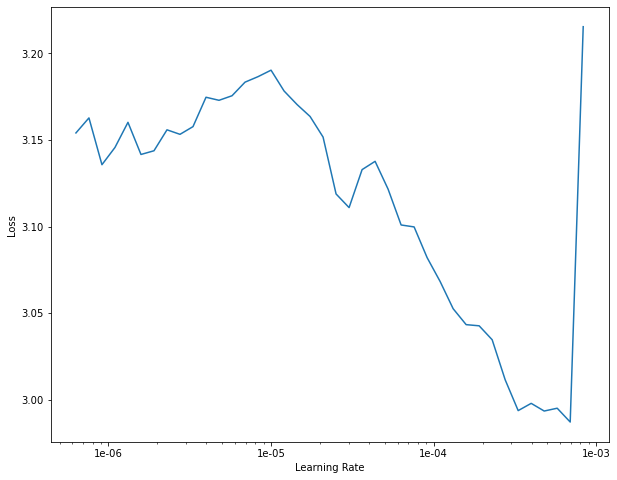

In [60]:
learn.recorder.plot(skip_end=5)

In [59]:
learn.fit_one_cycle(5, 1e-4)

epoch     train_loss  valid_loss  time    
0         2.452930    2.451410    03:25     
1         2.009182    1.870561    03:18     
2         1.736086    1.763813    03:18     
3         1.678090    1.761068    03:19     
4         1.598261    1.696922    03:19     


In [60]:
learn.save('stage1-256')

In [61]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(10, slice(1e-6, 5e-5))

epoch     train_loss  valid_loss  time    
0         1.607625    1.658668    03:32     
1         1.593203    1.662302    03:31     
2         1.571054    1.599864    03:31     
3         1.496499    1.596443    03:32     
4         1.444070    1.542585    03:32     
5         1.416924    1.613738    03:31     
6         1.362719    1.517496    03:30     
7         1.339550    1.512014    03:30     
8         1.332912    1.580672    03:31     
9         1.322668    1.545530    03:32     


In [63]:
learn.save('stage2-256')

In [64]:
learn.data = get_data(16, 512)

/opt/conda/envs/fastai_v1/lib/python3.7/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [65]:
learn.freeze()
learn.lr_find()

epoch     train_loss  valid_loss  time    
0         24.193050   #na#        00:43     
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/envs/fastai_v1/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


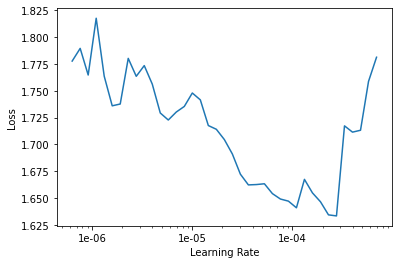

In [66]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(5, 1e-4)

epoch     train_loss  valid_loss  time    
0         1.558570    1.461157    09:39     
1         1.549129    1.441100    09:37     
2         1.448478    1.433841    09:37     
3         1.363224    1.372783    09:37     
4         1.342652    1.332175    09:37     


In [68]:
learn.save('stage1-512')

In [69]:
learn.unfreeze()

In [70]:
learn.fit_one_cycle(10, slice(1e-6, 5e-5))

epoch     train_loss  valid_loss  time    
0         1.333861    1.327966    10:30     
1         1.340260    1.342781    10:29     
2         1.349846    1.323099    10:30     
3         1.300457    1.378484    10:30     
4         1.227940    1.291438    10:30     
5         1.239121    1.275809    10:30     
6         1.181905    1.281181    10:30     
7         1.192343    1.304332    10:31     
8         1.134504    1.265687    10:31     
9         1.143420    1.279221    10:31     


In [71]:
learn.save('stage2-512')

In [56]:
learn.data = get_data(6,800)

/opt/conda/envs/fastai_v1/lib/python3.7/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [57]:
learn.freeze()
learn.fit_one_cycle(5, 1e-4)

epoch     train_loss  valid_loss  time    
0         1.562076    1.487270    28:02     
1         1.399035    1.366140    27:54     
2         1.290703    1.338497    27:54     
3         1.246997    1.256975    27:47     
4         1.196360    1.260868    27:43     


In [58]:
learn.save('stage1-800')

In [58]:
learn.load('stage1-512')

Learner(data=ImageDataBunch;

Train: LabelList (21837 items)
x: ObjectItemList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: ObjectCategoryList
ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512),ImageBBox (512, 512)
Path: /home/jupyter/.fastai/data/coco_sample/train_sample;

Valid: LabelList (0 items)
x: ObjectItemList

y: ObjectCategoryList

Path: /home/jupyter/.fastai/data/coco_sample/train_sample;

Test: None, model=RetinaNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [59]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6, 5e-5))

epoch     train_loss  valid_loss  time    
0         1.215166    1.244154    29:49     
1         1.202370    1.328311    29:46     
2         1.240097    1.308289    29:45     
3         1.230959    1.283555    29:43     
4         1.165593    1.254818    29:40     
5         1.169938    1.286061    29:35     
6         1.191139    1.242391    29:25     
7         1.085130    1.215395    29:21     
8         1.061329    1.248111    29:10     
9         1.035078    1.240656    29:10     


In [60]:
learn.save('stage2-800')

## Results

In [75]:
learn = learn.load('stage2-300')

In [72]:
img,target = next(iter(data.valid_dl))
with torch.no_grad():
    output = learn.model(img)

First we need to remove the padding that was added to collate our targets together.

In [73]:
def unpad(tgt_bbox, tgt_clas, pad_idx=0):
    i = torch.min(torch.nonzero(tgt_clas - pad_idx)) if sum(tgt_clas) > 0 else 0
    #i = torch.min(torch.nonzero(tgt_clas-pad_idx))
    return tlbr2cthw(tgt_bbox[i:]), tgt_clas[i:]-1+pad_idx

Then we process the outputs of the model: we convert the activations of the regressor to bounding boxes and the predictions to probabilities, only keeping those above a given threshold.

In [74]:
def process_output(output, i, detect_thresh=0.25):
    "Process `output[i]` and return the predicted bboxes above `detect_thresh`."
    clas_pred,bbox_pred,sizes = output[0][i], output[1][i], output[2]
    anchors = create_anchors(sizes, ratios, scales).to(clas_pred.device)
    bbox_pred = activ_to_bbox(bbox_pred, anchors)
    clas_pred = torch.sigmoid(clas_pred)
    detect_mask = clas_pred.max(1)[0] > detect_thresh
    bbox_pred, clas_pred = bbox_pred[detect_mask], clas_pred[detect_mask]
    bbox_pred = tlbr2cthw(torch.clamp(cthw2tlbr(bbox_pred), min=-1, max=1))    
    scores, preds = clas_pred.max(1)
    return bbox_pred, scores, preds

Helper functions to plot the results

In [75]:
def _draw_outline(o:Patch, lw:int):
    "Outline bounding box onto image `Patch`."
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax:plt.Axes, b:Collection[int], color:str='white', text=None, text_size=14):
    "Draw bounding box on `ax`."
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    _draw_outline(patch, 4)
    if text is not None:
        patch = ax.text(*b[:2], text, verticalalignment='top', color=color, fontsize=text_size, weight='bold')
        _draw_outline(patch,1)

In [76]:
def show_preds(img, output, idx, detect_thresh=0.25, classes=None):
    bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
    bbox_pred, preds, scores = bbox_pred.cpu(), preds.cpu(), scores.cpu()
    t_sz = torch.Tensor([*img.size])[None].float()
    bbox_pred[:,:2] = bbox_pred[:,:2] - bbox_pred[:,2:]/2
    bbox_pred[:,:2] = (bbox_pred[:,:2] + 1) * t_sz/2
    bbox_pred[:,2:] = bbox_pred[:,2:] * t_sz
    bbox_pred = bbox_pred.long()
    _, ax = plt.subplots(1,1)
    for bbox, c, scr in zip(bbox_pred, preds, scores):
        img.show(ax=ax)
        txt = str(c.item()) if classes is None else classes[c.item()+1]
        draw_rect(ax, [bbox[1],bbox[0],bbox[3],bbox[2]], text=f'{txt} {scr:.2f}')

And let's have a look at one picture.

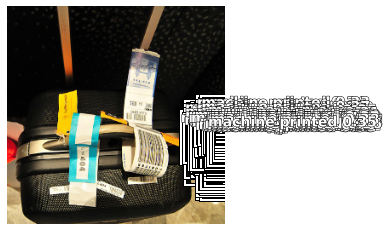

In [77]:
idx = 0
img = data.train_ds[idx][0]
show_preds(img, output, idx, detect_thresh=0.3, classes=data.classes)

It looks like a lot of our anchors are detecting kind of the same object. We use an algorithm called Non-Maximum Suppression to remove near-duplicates: going from the biggest score predicted to the lowest, we take the corresponding bounding boxes and remove all the bounding boxes down the list that have an IoU > 0.5 with this one. We continue the process until we have reached the end of the list.

In [78]:
def nms(boxes, scores, thresh=0.3):
    idx_sort = scores.argsort(descending=True)
    boxes, scores = boxes[idx_sort], scores[idx_sort]
    to_keep, indexes = [], torch.LongTensor(range_of(scores))
    while len(scores) > 0:
        to_keep.append(idx_sort[indexes[0]])
        iou_vals = IoU_values(boxes, boxes[:1]).squeeze()
        mask_keep = iou_vals < thresh
        if len(mask_keep.nonzero()) == 0: break
        boxes, scores, indexes = boxes[mask_keep], scores[mask_keep], indexes[mask_keep]
    return LongTensor(to_keep)

In [79]:
def process_output(output, i, detect_thresh=0.25):
    clas_pred,bbox_pred,sizes = output[0][i], output[1][i], output[2]
    anchors = create_anchors(sizes, ratios, scales).to(clas_pred.device)
    bbox_pred = activ_to_bbox(bbox_pred, anchors)
    clas_pred = torch.sigmoid(clas_pred)
    detect_mask = clas_pred.max(1)[0] > detect_thresh
    bbox_pred, clas_pred = bbox_pred[detect_mask], clas_pred[detect_mask]
    bbox_pred = tlbr2cthw(torch.clamp(cthw2tlbr(bbox_pred), min=-1, max=1))    
    if clas_pred.numel() == 0: return [],[],[]
    scores, preds = clas_pred.max(1)
    return bbox_pred, scores, preds

In [80]:
def show_preds(img, output, idx, detect_thresh=0.25, classes=None, ax=None):
    bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
    if len(scores) != 0:
        to_keep = nms(bbox_pred, scores)
        bbox_pred, preds, scores = bbox_pred[to_keep].cpu(), preds[to_keep].cpu(), scores[to_keep].cpu()
        t_sz = torch.Tensor([*img.size])[None].float()
        bbox_pred[:,:2] = bbox_pred[:,:2] - bbox_pred[:,2:]/2
        bbox_pred[:,:2] = (bbox_pred[:,:2] + 1) * t_sz/2
        bbox_pred[:,2:] = bbox_pred[:,2:] * t_sz
        bbox_pred = bbox_pred.long()
    if ax is None: _, ax = plt.subplots(1,1)
    img.show(ax=ax)
    for bbox, c, scr in zip(bbox_pred, preds, scores):
        txt = str(c.item()) if classes is None else classes[c.item()+1]
        draw_rect(ax, [bbox[1],bbox[0],bbox[3],bbox[2]], text=f'{txt} {scr:.2f}')

In [81]:
def show_results(learn, start=0, n=5, detect_thresh=0.5, figsize=(10,25)):
    x,y = learn.data.one_batch(DatasetType.Valid, cpu=False)
    with torch.no_grad():
        z = learn.model.eval()(x)
    _,axs = plt.subplots(n, 2, figsize=figsize)
    for i in range(n):
        img,bbox = learn.data.valid_ds[start+i]
        img.show(ax=axs[i,0], y=bbox)
        show_preds(img, z, start+i, detect_thresh=detect_thresh, classes=learn.data.classes, ax=axs[i,1])

In [82]:
learn = learn.load('stage2-800')

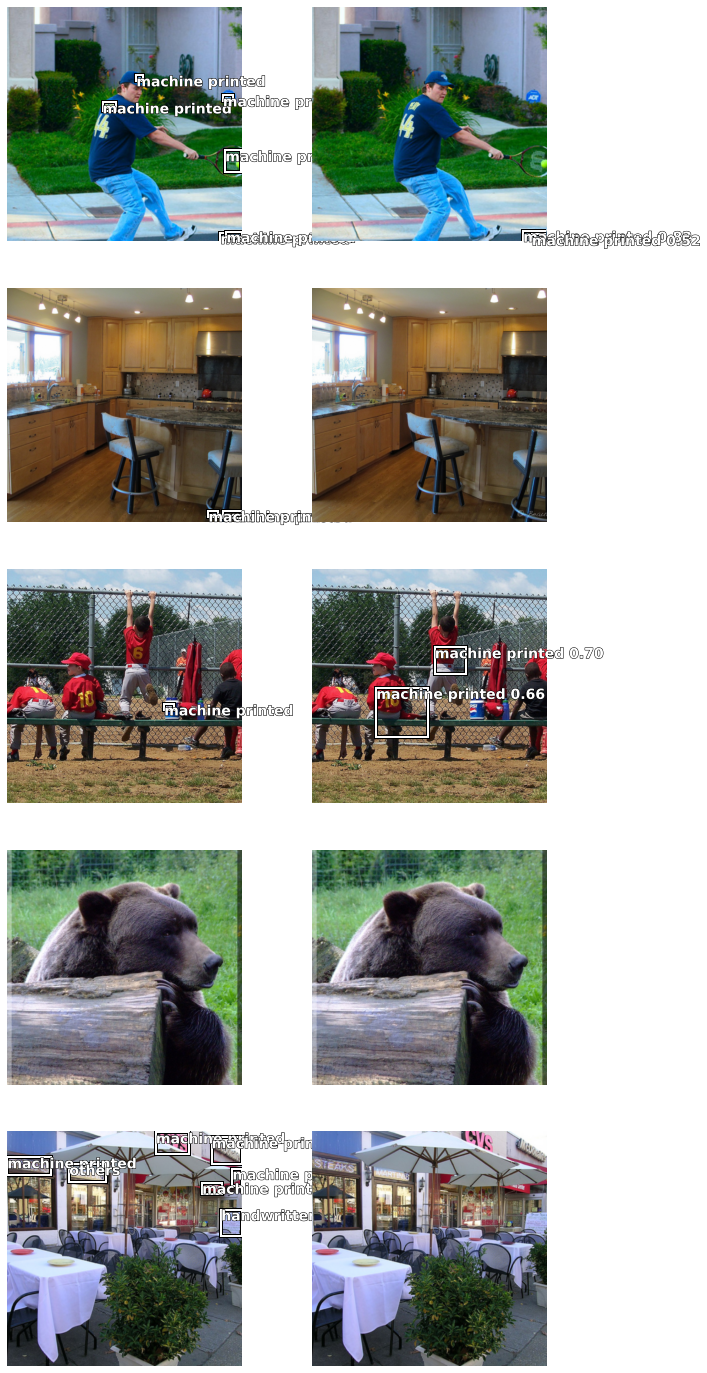

In [83]:
show_results(learn)#, start=10)

## mAP

A metric often used for this kind of task is the mean Average Precision (our mAP). It relies on computing the cumulated precision and recall for each class, then tries to compute the area under the precision/recall curve we can draw.

In [77]:
def get_predictions(output, idx, detect_thresh=0.05):
    bbox_pred, scores, preds = process_output(output, idx, detect_thresh)
    if len(scores) == 0: return [],[],[]
    to_keep = nms(bbox_pred, scores)
    return bbox_pred[to_keep], preds[to_keep], scores[to_keep]

In [78]:
def compute_ap(precision, recall):
    "Compute the average precision for `precision` and `recall` curve."
    recall = np.concatenate(([0.], list(recall), [1.]))
    precision = np.concatenate(([0.], list(precision), [0.]))
    for i in range(len(precision) - 1, 0, -1):
        precision[i - 1] = np.maximum(precision[i - 1], precision[i])
    idx = np.where(recall[1:] != recall[:-1])[0]
    ap = np.sum((recall[idx + 1] - recall[idx]) * precision[idx + 1])
    return ap

In [79]:
def compute_class_AP(model, dl, n_classes, iou_thresh=0.5, detect_thresh=0.35, num_keep=100):
    tps, clas, p_scores = [], [], []
    classes, n_gts = LongTensor(range(n_classes)),torch.zeros(n_classes).long()
    with torch.no_grad():
        for input,target in progress_bar(dl):
            output = model(input)
            for i in range(target[0].size(0)):
                bbox_pred, preds, scores = get_predictions(output, i, detect_thresh)
                tgt_bbox, tgt_clas = unpad(target[0][i], target[1][i])
                if len(bbox_pred) != 0 and len(tgt_bbox) != 0:
                    ious = IoU_values(bbox_pred, tgt_bbox)
                    max_iou, matches = ious.max(1)
                    detected = []
                    for i in range_of(preds):
                        if max_iou[i] >= iou_thresh and matches[i] not in detected and tgt_clas[matches[i]] == preds[i]:
                            detected.append(matches[i])
                            tps.append(1)
                        else: tps.append(0)
                    clas.append(preds.cpu())
                    p_scores.append(scores.cpu())
                n_gts += (tgt_clas.cpu()[:,None] == classes[None,:]).sum(0)
    tps, p_scores, clas = torch.tensor(tps), torch.cat(p_scores,0), torch.cat(clas,0)
    fps = 1-tps
    idx = p_scores.argsort(descending=True)
    tps, fps, clas = tps[idx], fps[idx], clas[idx]
    aps = []
    #return tps, clas
    for cls in range(n_classes):
        tps_cls, fps_cls = tps[clas==cls].float().cumsum(0), fps[clas==cls].float().cumsum(0)
        if tps_cls.numel() != 0 and tps_cls[-1] != 0:
            precision = tps_cls / (tps_cls + fps_cls + 1e-8)
            recall = tps_cls / (n_gts[cls] + 1e-8)
            aps.append(compute_ap(precision, recall))
        else: aps.append(0.)
    return aps

In [80]:
L = compute_class_AP(learn.model, data.valid_dl, data.c-1)

In [81]:
for ap,cl in zip(L, data.classes[1:]): print(f'{cl}: {ap:.6f}')

handwritten: 0.014837
machine printed: 0.078853
others: 0.000000
